# Selección de cripto activos para una cartera de inversión

# Trabajo Práctico 1 -  Análisis y Visualización

## Introducción

En este práctico se pretende obtener una primera aproximación de los datasets bajo análisis. En primer lugar se cargan y presentan brevemente los datos, luego se proponen las consignas a seguir para la resolución del mismo.

### Carga del dataset

Primero, comenzamos importando las librerías necesarias. Luego, cargaremos un único dataset, pero recuerden que en la carpeta **data** tenemos un dataset por cada activo disponible.

In [1]:
import pandas as pd
import numpy as np
import os
import re
import requests
import matplotlib.pyplot as plt
import seaborn #as sns

### Variables

- __Fecha__: se la usa como índice del _pandasDataFrame_.

#### Activos ( con sus respectivos precios OHLC ):

Todos los activos están expresados en una misma moneda, *quote*, que en nuestro caso es USDT ( un token de USD )

- __BTCUSDT__
- __ETHUSDT__
- __BNBUSDT__
- __ADAUSDT__
- __DOTUSDT__
- __BCHUSDT__
- __LTCUSDT__
- __LINKUSDT__
- __ETCUSDT__
- __EOSUSDT__
- __XMRUSDT__
- __NEOUSDT__
- __AAVEUSDT__
- __MKRUSDT__
- __COMPUSDT__
- __DASHUSDT__


#### ¿Cuándo opera el mercado?

Este es un mercado que trabaja 24/7, es decir, está operando constantemente. En cada caso tenemos datos por hora (por lo tanto, una sesión equivale a una hora) de los diferentes precios **OHLC** de cada activo y el volumen, a saber:

- **OPEN :** precio al cual abre el activo, en la sesión.
- **HIGH :** mayor precio alcanzado por el activo en la sesión.
- **LOW :** menor precio alcanzado por el activo en la sesión.
- **CLOSE :** precio del activo al momento de cerrar la sesión. 
- **VOLUMEN :** cantidad del activo operado en la sesión.

Para conocer más sobre estos proyectos, pueden visitar la página [CoinMarketCap](https://coinmarketcap.com/). Allí encontrarán datos interesantes sobre cada par, su posición en el mercado, nacimiento de cada proyecto, entre otros.

In [2]:
##Abrir todos los Data Set de criptomonedas y hacer un solo data frame agregando una columna que lo identifica
df=pd.DataFrame()  

#Url donde se encuentran los datos
url = 'https://github.com/charly3d/Diplomatura-de-Datos-Mentoria/blob/main/data/'             

#Listado con los nombres de los criptoactivos que figuran en el url
t = requests.get(url).text                                                                    
criptoactivos = re.findall(r'data/(\w+)\.csv', t)      

#Url Raw para poder levantar los datos
url2='https://raw.githubusercontent.com/charly3d/Diplomatura-de-Datos-Mentoria/main/data/'   

#Por cada cripto activo en la lista crea un dataframe, le agrega una columna con el nombre del cripto y los concatena                                                                          
for c in criptoactivos:                                                                       
  dfcripto=pd.read_csv(url2 + c+'.csv',index_col=0, parse_dates=True, dayfirst= True)
  dfcripto.loc[:,'cripto_activo']=c
  df = pd.concat([df,dfcripto],axis=0)

df

open   close    high     low      volume cripto_activo
2018-01-01 00:00:00     NaN     NaN     NaN     NaN         NaN      AAVEUSDT
2018-01-01 01:00:00     NaN     NaN     NaN     NaN         NaN      AAVEUSDT
2018-01-01 02:00:00     NaN     NaN     NaN     NaN         NaN      AAVEUSDT
2018-01-01 03:00:00     NaN     NaN     NaN     NaN         NaN      AAVEUSDT
2018-01-01 04:00:00     NaN     NaN     NaN     NaN         NaN      AAVEUSDT
...                     ...     ...     ...     ...         ...           ...
2021-05-16 11:00:00  402.23  398.90  404.47  397.26  4005.66944       XMRUSDT
2021-05-16 12:00:00  399.12  393.94  401.34  393.18  3907.98362       XMRUSDT
2021-05-16 13:00:00  393.65  398.16  398.64  391.34  3962.75618       XMRUSDT
2021-05-16 14:00:00  398.03  393.24  399.40  390.54  3418.55213       XMRUSDT
2021-05-16 15:00:00  393.02  390.40  393.19  385.91  2479.33209       XMRUSDT

[472960 rows x 6 columns]

In [3]:
df.head()

open  close  high  low  volume cripto_activo
2018-01-01 00:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 01:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 02:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 03:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 04:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT

In [4]:
df.tail()

open   close    high     low      volume cripto_activo
2021-05-16 11:00:00  402.23  398.90  404.47  397.26  4005.66944       XMRUSDT
2021-05-16 12:00:00  399.12  393.94  401.34  393.18  3907.98362       XMRUSDT
2021-05-16 13:00:00  393.65  398.16  398.64  391.34  3962.75618       XMRUSDT
2021-05-16 14:00:00  398.03  393.24  399.40  390.54  3418.55213       XMRUSDT
2021-05-16 15:00:00  393.02  390.40  393.19  385.91  2479.33209       XMRUSDT

# ¡Actividades!

El objetivo general del práctico es realizar un análsis exploratorio de __los activos__ propuestos.
Se plantean algunas sugerencias para explorar las series en forma individual y conjunta por medio de medidas descriptivas y visualizaciones.

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como __series de tiempo__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. 

A continuación comparto algunos links que puede ser de ayuda para el abordaje de nuestro problema.

- [Tutorial: Time Series analysis with pandas](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)
- [Kaggle : Everything you can do with a time series](https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series)
- [Kaggle: Time series analysis in Python](https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python)

## Parte I

Se proponen las siguientes actividades:


- Determine el tipo de variables y el período de tiempo bajo análisis. ¿El periodo es el mismo para todos los activos?


- Indague sobre la existencia de valores faltantes. ¿Cómo trataría a los faltantes? ¿Por qué? 


- Analice las distribuciones por medio de gráficos y medidas de estadística descriptiva (por ejemplo: media, varianza y coeficiente de variación).


- ¿Hay outliers?


- Seleccione un activo y grafique un boxplot para cada mes (y/o semana). ¿La distribución se mantiene constante en el tiempo?


- Explore la existencia de estacionalidad.


- Estudie la evolución temporal de los activos. ¿En qué sentido tienden a moverse? ¿Hay períodos de crisis? ¿Los activos tienden a moverse en forma conjunta?  En caso de que existan crisis, ¿son globales o individuales? 

## Parte II

Que el precio de un activo sea mayor al de otro no significa directamente que el primero sea una mejor inversión, entonces, el análisis de este tipo de series se centra por lo general en el cambio porcentual de los precios en vez del cambio en los valores absolutos. Esto resulta en que en vez de modelar los precios de los activos, previamente se habitúa realizar una transformación logarítmica o trabajar con la tasa de rendimiento. 


- Calcule los logaritmos naturales de los precios de los activos y la serie de tasas de rendimiento (para ello explorar el método pct_change()).


- Realice nuevamente un análisis de las distribuciones por medio de gráficos y medidas de estadística descriptiva con las nuevas series. 


- Explore la volatilidad de las series, por ejemplo graficando las desviaciones estándar móviles.

# Fecha de entrega

- __Versión preliminar: 1/6__ 

- __Versión final: 6/6__

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

# PARTE I - RESPUESTAS

## TIPOS DE VARIABLES

### Columnas **open, close, high, low y volumen** : Variables Cuantitativas Continuas

Las variables open, close, high, low y volume son de tipo cuantitativas numéricas continuas.

### Columna **cripto_activo**: Variable Categórica

Esta variable es Categórica, ya que contiene datos de tipo String.
Obtenemos los valores únicos en la columna 'cripto_activo' del dataframe y determinamos que tenemos 16 cripto activos para analizar.


In [5]:
df['cripto_activo'].unique()

array(['AAVEUSDT', 'ADAUSDT', 'BCHUSDT', 'BNBUSDT', 'BTCUSDT', 'COMPUSDT',
       'DASHUSDT', 'DOTUSDT', 'EOSUSDT', 'ETCUSDT', 'ETHUSDT', 'LINKUSDT',
       'LTCUSDT', 'MKRUSDT', 'NEOUSDT', 'XMRUSDT'], dtype=object)

### Columna **index**: Variable Cuantitativa Continua

Se utiliza la fecha de la observación como índice. 
Dicha variable es cuantitativa continua y el tipo de dato es Timestamp.

En los csv originales era de tipo string, pero al cargar el dataset con la funcion pd.read_csv se incluyeron los parámetros "parse_dates=True, dayfirst= True" para convirtirlos a Timestamp. Otra forma de realizar la conversión hubiera sido aplicar la función pd.to_datetime(df.index) despues de cargar el dataset.

In [6]:
#verificamos que el indice ya es de tipo datetime
df.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2021-05-16 06:00:00', '2021-05-16 07:00:00',
               '2021-05-16 08:00:00', '2021-05-16 09:00:00',
               '2021-05-16 10:00:00', '2021-05-16 11:00:00',
               '2021-05-16 12:00:00', '2021-05-16 13:00:00',
               '2021-05-16 14:00:00', '2021-05-16 15:00:00'],
              dtype='datetime64[ns]', length=472960, freq=None)

 Podremos filtrar un dia, un mes o un año en particular utlizando esta columna.

In [7]:
#consultando un día en particular
df.loc['2019-08-10']

open  close   high    low     volume cripto_activo
2019-08-10 00:00:00    NaN    NaN    NaN    NaN        NaN      AAVEUSDT
2019-08-10 01:00:00    NaN    NaN    NaN    NaN        NaN      AAVEUSDT
2019-08-10 02:00:00    NaN    NaN    NaN    NaN        NaN      AAVEUSDT
2019-08-10 03:00:00    NaN    NaN    NaN    NaN        NaN      AAVEUSDT
2019-08-10 04:00:00    NaN    NaN    NaN    NaN        NaN      AAVEUSDT
...                    ...    ...    ...    ...        ...           ...
2019-08-10 19:00:00  91.12  91.00  91.28  90.25   80.64569       XMRUSDT
2019-08-10 20:00:00  91.00  91.15  91.38  90.99  165.13874       XMRUSDT
2019-08-10 21:00:00  91.26  90.91  91.39  90.49  118.32006       XMRUSDT
2019-08-10 22:00:00  90.91  90.92  91.28  90.44  210.61285       XMRUSDT
2019-08-10 23:00:00  90.82  90.78  91.07  90.57   15.15642       XMRUSDT

[384 rows x 6 columns]

In [8]:
#consultando un mes en particular
df.loc['2019-08']

open  close   high    low     volume cripto_activo
2019-08-01 00:00:00    NaN    NaN    NaN    NaN        NaN      AAVEUSDT
2019-08-01 01:00:00    NaN    NaN    NaN    NaN        NaN      AAVEUSDT
2019-08-01 02:00:00    NaN    NaN    NaN    NaN        NaN      AAVEUSDT
2019-08-01 03:00:00    NaN    NaN    NaN    NaN        NaN      AAVEUSDT
2019-08-01 04:00:00    NaN    NaN    NaN    NaN        NaN      AAVEUSDT
...                    ...    ...    ...    ...        ...           ...
2019-08-31 19:00:00  67.06  66.93  67.17  66.89   26.09940       XMRUSDT
2019-08-31 20:00:00  67.04  66.29  67.04  66.07  394.82248       XMRUSDT
2019-08-31 21:00:00  66.29  67.68  67.68  66.14  791.79016       XMRUSDT
2019-08-31 22:00:00  67.74  67.48  67.92  67.35  108.14482       XMRUSDT
2019-08-31 23:00:00  67.36  67.34  67.45  67.16   41.34893       XMRUSDT

[11904 rows x 6 columns]

In [9]:
#consultando un año en particular
df.loc['2018']

open  close  high  low  volume cripto_activo
2018-01-01 00:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 01:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 02:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 03:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
2018-01-01 04:00:00   NaN    NaN   NaN  NaN     NaN      AAVEUSDT
...                   ...    ...   ...  ...     ...           ...
2018-12-31 19:00:00   NaN    NaN   NaN  NaN     NaN       XMRUSDT
2018-12-31 20:00:00   NaN    NaN   NaN  NaN     NaN       XMRUSDT
2018-12-31 21:00:00   NaN    NaN   NaN  NaN     NaN       XMRUSDT
2018-12-31 22:00:00   NaN    NaN   NaN  NaN     NaN       XMRUSDT
2018-12-31 23:00:00   NaN    NaN   NaN  NaN     NaN       XMRUSDT

[140160 rows x 6 columns]

### Columnas Año, Mes, Semana y Días de la semana

Agregamos las columnas Year, Monthly y Week por que serán utiles para las visualizaciones. 

In [10]:
# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Week'] = df.index.week
df['Weekday']=df.index.day_name()

# Display a random sampling of 5 rows
df.sample(5, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


open       close        high  ...  Month  Week   Weekday
2019-12-13 11:00:00     50.3800     50.4200     50.4400  ...     12    50    Friday
2020-11-10 23:00:00     67.8150     66.9880     68.1640  ...     11    46   Tuesday
2019-02-22 12:00:00      4.5152      4.5168      4.5395  ...      2     8    Friday
2018-10-27 07:00:00     16.3960     16.3740     16.4270  ...     10    43  Saturday
2018-03-02 18:00:00  10913.8600  10909.9900  10950.0000  ...      3     9    Friday

[5 rows x 10 columns]

# 2) Análisis de Valores faltantes

Nuestro primer objetivo es determinar el período bajo análisis, por lo que obtenemos las fechas mínima y máxima del dataframe completo.

In [11]:
print('Fecha Mínima: ', df.index.min())
print('Fecha Máxima: ', df.index.max())

Fecha Mínima:  2018-01-01 00:00:00
Fecha Máxima:  2021-05-16 15:00:00


Validamos ahora si contamos con todos los valores para cada crypto activo en esas fechas:

In [12]:
#consultando el primer dia del dataframe
df.loc['2018-01-01 00:00:00']

open       close        high  ...  Month  Week Weekday
2018-01-01         NaN         NaN         NaN  ...      1     1  Monday
2018-01-01         NaN         NaN         NaN  ...      1     1  Monday
2018-01-01         NaN         NaN         NaN  ...      1     1  Monday
2018-01-01      8.5478      8.3559      8.5478  ...      1     1  Monday
2018-01-01  13715.6500  13529.0100  13715.6500  ...      1     1  Monday
2018-01-01         NaN         NaN         NaN  ...      1     1  Monday
2018-01-01         NaN         NaN         NaN  ...      1     1  Monday
2018-01-01         NaN         NaN         NaN  ...      1     1  Monday
2018-01-01         NaN         NaN         NaN  ...      1     1  Monday
2018-01-01         NaN         NaN         NaN  ...      1     1  Monday
2018-01-01    733.0100    727.6200    734.5200  ...      1     1  Monday
2018-01-01         NaN         NaN         NaN  ...      1     1  Monday
2018-01-01    223.6900    219.9800    223.6900  ...      1     1  Monday
2018-01-01         NaN         NaN         NaN  ...      1     1  Monday
2018-01-01     74.8540     72.5650     75.0720  ...      1     1  Monday
2018-01-01         NaN         NaN         NaN  ...      1     1  Monday

[16 rows x 10 columns]

In [13]:
#consultando el ultimo dia del dataframe
df.loc['2021-05-16 15:00:00']

open       close        high  ...  Month  Week Weekday
2021-05-16 15:00:00    523.1800    519.1600    524.2000  ...      5    19  Sunday
2021-05-16 15:00:00      2.3186      2.2943      2.3196  ...      5    19  Sunday
2021-05-16 15:00:00   1212.6500   1211.6400   1219.1500  ...      5    19  Sunday
2021-05-16 15:00:00    582.3700    578.1200    583.2000  ...      5    19  Sunday
2021-05-16 15:00:00  48284.3200  48013.7200  48331.4500  ...      5    19  Sunday
2021-05-16 15:00:00    699.4500    698.1300    700.2400  ...      5    19  Sunday
2021-05-16 15:00:00    349.7400    345.7300    350.5300  ...      5    19  Sunday
2021-05-16 15:00:00     43.8890     43.3250     44.0390  ...      5    19  Sunday
2021-05-16 15:00:00     10.4295     10.4335     10.5052  ...      5    19  Sunday
2021-05-16 15:00:00     97.2000     97.0260     97.4980  ...      5    19  Sunday
2021-05-16 15:00:00   3677.1200   3679.3200   3684.8200  ...      5    19  Sunday
2021-05-16 15:00:00     42.4310     42.1980     42.5120  ...      5    19  Sunday
2021-05-16 15:00:00    308.6100    305.3500    309.5700  ...      5    19  Sunday
2021-05-16 15:00:00   4689.8500   4668.4700   4697.7900  ...      5    19  Sunday
2021-05-16 15:00:00     96.5300     96.2000     96.8570  ...      5    19  Sunday
2021-05-16 15:00:00    393.0200    390.4000    393.1900  ...      5    19  Sunday

[16 rows x 10 columns]

Estudiando el periodo se observa que si bien todos los csv originales contienen registros desde el día 01/01/2018 al 16/05/2021, muchos tienen valores NaN en el principio de este intervalo de tiempo, tal vez porque dichas monedas no existian en ese momento o no se pudieron obtener mediciones de las mismas.


Verificamos que no existen filas en donde por ejemplo la columna volume sea nula y la columna open no, ya que la cantidad de filas que tienen al menos un dato nulo es la misma que aquellas con al menos 5 datos nulos.


In [14]:
print('Cantidad de filas: ',len(df))
print('Cantidad de filas con al menos 5 NaN: ',len(df.dropna(axis=0,subset=['open','close','high','low','volume'],thresh=5)))
print('Cantidad de filas con al menos 1 NaN: ' ,len(df.dropna(axis=0,subset=['open','close','high','low','volume'],thresh=1)))

Cantidad de filas:  472960
Cantidad de filas con al menos 5 NaN:  323054
Cantidad de filas con al menos 1 NaN:  323054


Debido a que no contamos con observaciones de todos los crypto activos para la fecha mínima del dataframe, necesitamos determinar para cada crypto activo:

=> cual es la fecha mínima a partir de la cual contamos con observaciones válidas.

=> cual es la fecha máxima hasta la cual contamos con observaciones válidas.

In [15]:
#creamos un dataframe para mostrar por cada moneda la fecha minima y máxima de sus observaciones (con valores para todas las columnas)
df_period_crypto = pd.DataFrame(columns=['crypto_activo', 'date_min', 'date_max'])

for i in df['cripto_activo'].unique():
    f_min=df[(df['cripto_activo']==i)& (pd.notnull(df['open'])) & (pd.notnull(df['close']))& (pd.notnull(df['high']))& (pd.notnull(df['low']))& (pd.notnull(df['volume']))].index.min()
    f_max=df[(df['cripto_activo']==i)& (pd.notnull(df['open'])) & (pd.notnull(df['close']))& (pd.notnull(df['high']))& (pd.notnull(df['low']))& (pd.notnull(df['volume']))].index.max()
    df_period_crypto = df_period_crypto.append({'crypto_activo': i, 'date_min':f_min, 'date_max':f_max}, ignore_index=True)   

df_period_crypto=df_period_crypto.sort_values('date_min',ascending=False)

df_period_crypto

crypto_activo            date_min            date_max
0       AAVEUSDT 2020-10-15 03:00:00 2021-05-16 15:00:00
7        DOTUSDT 2020-08-18 23:00:00 2021-05-16 15:00:00
13       MKRUSDT 2020-07-23 14:00:00 2021-05-16 15:00:00
5       COMPUSDT 2020-06-25 06:00:00 2021-05-16 15:00:00
2        BCHUSDT 2019-11-28 10:00:00 2021-05-16 15:00:00
6       DASHUSDT 2019-03-28 04:00:00 2021-05-16 15:00:00
15       XMRUSDT 2019-03-15 04:00:00 2021-05-16 15:00:00
11      LINKUSDT 2019-01-16 10:00:00 2021-05-16 15:00:00
9        ETCUSDT 2018-06-12 02:00:00 2021-05-16 15:00:00
8        EOSUSDT 2018-05-28 05:00:00 2021-05-16 15:00:00
1        ADAUSDT 2018-04-17 04:00:00 2021-05-16 15:00:00
3        BNBUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
4        BTCUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
10       ETHUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
12       LTCUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
14       NEOUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00

Haciendo un análisis de los resultados pudimos determinar que el periodo donde todos los cripto activos tendrian valores seria desde el 15/10/2020 al 16/05/2021. 

In [16]:
print('Fecha Mínima: ', df_period_crypto.date_min.max())
print('Fecha Máxima: ', df_period_crypto.date_max.max())

Fecha Mínima:  2020-10-15 03:00:00
Fecha Máxima:  2021-05-16 15:00:00


**El período bajo estudio finalmente será el obtenido al principio del análisis:**
* DESDE: **15-10-2020 03:00:00**
* HASTA: **16-05-2021 15:00:00**

**Por esta razón procedemos a filtrar el dataset original dejando solo los registros que estan comprendidos en el rango en común para todos los cripto activos**

Estamos conscientes que al utilizar el período mencionado se perdería mucha información importante de los otros cripto activos, ya que al menos 5 cripto activos tienen información desde el 01/01/2018, sin embargo creemos que un lapso de 7 meses es suficiente para estudiar el comportamiento de los cripto activos.

In [17]:
df_mask=df.index>= str(df_period_crypto.date_min.max())
df = df[df_mask]
df.reset_index
print(df)

                        open    close     high  ...  Month  Week   Weekday
2020-10-15 03:00:00   51.430   47.099   59.000  ...     10    42  Thursday
2020-10-15 04:00:00   47.097   47.486   47.916  ...     10    42  Thursday
2020-10-15 05:00:00   47.429   49.000   49.746  ...     10    42  Thursday
2020-10-15 06:00:00   49.000   49.031   49.496  ...     10    42  Thursday
2020-10-15 07:00:00   49.150   49.000   49.208  ...     10    42  Thursday
...                      ...      ...      ...  ...    ...   ...       ...
2021-05-16 11:00:00  402.230  398.900  404.470  ...      5    19    Sunday
2021-05-16 12:00:00  399.120  393.940  401.340  ...      5    19    Sunday
2021-05-16 13:00:00  393.650  398.160  398.640  ...      5    19    Sunday
2021-05-16 14:00:00  398.030  393.240  399.400  ...      5    19    Sunday
2021-05-16 15:00:00  393.020  390.400  393.190  ...      5    19    Sunday

[82000 rows x 10 columns]


Volvemos a obtener los valores para la fecha mínima y observamos que todos los activos tienen valores.

In [18]:
df.loc[str(df_period_crypto.date_min.max())]

open       close  ...  Week   Weekday
2020-10-15 03:00:00     51.43000     47.0990  ...    42  Thursday
2020-10-15 03:00:00      0.10512      0.1054  ...    42  Thursday
2020-10-15 03:00:00    255.64000    257.1400  ...    42  Thursday
2020-10-15 03:00:00     30.70730     30.8335  ...    42  Thursday
2020-10-15 03:00:00  11361.58000  11378.9600  ...    42  Thursday
2020-10-15 03:00:00    106.66000    107.0500  ...    42  Thursday
2020-10-15 03:00:00     69.42000     69.4500  ...    42  Thursday
2020-10-15 03:00:00      4.09490      4.1306  ...    42  Thursday
2020-10-15 03:00:00      2.59720      2.6036  ...    42  Thursday
2020-10-15 03:00:00      5.34800      5.3677  ...    42  Thursday
2020-10-15 03:00:00    375.65000    376.6300  ...    42  Thursday
2020-10-15 03:00:00     10.63370     10.7001  ...    42  Thursday
2020-10-15 03:00:00     49.45000     49.6000  ...    42  Thursday
2020-10-15 03:00:00    556.29000    565.0800  ...    42  Thursday
2020-10-15 03:00:00     17.02200     17.1000  ...    42  Thursday
2020-10-15 03:00:00    126.42000    127.3600  ...    42  Thursday

[16 rows x 10 columns]

Procedemos a eliminar todas las filas con valores faltantes que existan dentro del período considerado.

In [19]:
df=df.dropna(axis=0,subset=['open','close','high','low','volume'],thresh=5)

Finalmente validamos que ya no hay valores NaN en el dataset completo.

In [20]:
df.isna().sum()


open             0
close            0
high             0
low              0
volume           0
cripto_activo    0
Year             0
Month            0
Week             0
Weekday          0
dtype: int64

#3) Análisis de distribuciones y medidas de estadística descriptiva

Analizamos la correlación entre las variables de precio y volumen para ver su comportamiento.

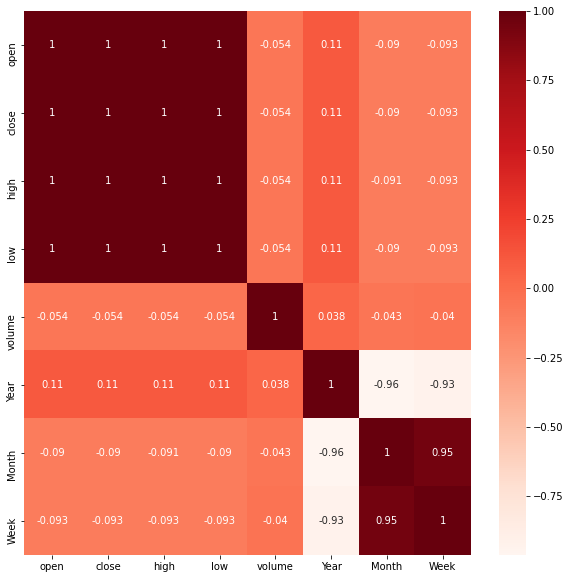

In [21]:
#Estudiando correlaciones entre variables
correlations = df.corr()
#Using Pearson Correlation
plt.figure(figsize=(10,10))

seaborn.heatmap(correlations, annot=True, cmap=plt.cm.Reds)
plt.show()

**Resolvemos considerar la variable "close" para las visualizaciones, ya que el coeficiente 1 con las emás variables d eprecio nos indica que siguen la misma distribución y por el momento no aportaría información adicional considerarlas a todas.**

Corroboramos esta conclusión obteniendo las medidas descriptivas de todas las variables en el período de interés.

In [22]:
#Definimos un nuevo dataset donde cada crypto activo representa una observacion y las variables son la media de cada variable original para ese crypto activo.
df_means =df.groupby(['cripto_activo']).agg({'open': ['mean'],'close': ['mean'], 'high': ['mean'],'low': ['mean'],'volume': ['mean']})
df_means


open         close  ...           low        volume
                       mean          mean  ...          mean          mean
cripto_activo                              ...                            
AAVEUSDT         249.990115    250.079478  ...    246.368882  1.189212e+04
ADAUSDT            0.670435      0.670863  ...      0.662029  2.654550e+07
BCHUSDT          515.765334    515.944754  ...    509.565338  1.326377e+04
BNBUSDT          188.906617    189.009851  ...    186.639586  1.630691e+05
BTCUSDT        37518.521084  37525.707386  ...  37239.493690  3.414171e+03
COMPUSDT         325.124901    325.236688  ...    320.988785  2.369627e+03
DASHUSDT         172.435598    172.491669  ...    170.299470  1.008950e+04
DOTUSDT           20.720517     20.728043  ...     20.469103  5.826821e+05
EOSUSDT            4.116489      4.117968  ...      4.064342  1.531676e+06
ETCUSDT           16.827322     16.845505  ...     16.534049  2.145679e+05
ETHUSDT         1417.009746   1417.653222  ...   1403.571434  4.700831e+04
LINKUSDT          23.273345     23.279410  ...     23.002717  3.771780e+05
LTCUSDT          160.082512    160.131712  ...    158.171655  7.066038e+04
MKRUSDT         1810.260812   1811.036879  ...   1786.744950  2.736172e+02
NEOUSDT           38.516523     38.532023  ...     37.991584  6.495198e+04
XMRUSDT          205.801638    205.848855  ...    203.734285  6.248919e+03

[16 rows x 5 columns]

In [23]:
#Obtenemos las medidas descriptivas de la distibucion de la media de cada variable
df_means.describe().round(2)

open     close      high       low       volume
           mean      mean      mean      mean         mean
count     16.00     16.00     16.00     16.00        16.00
mean    2666.75   2667.33   2686.54   2645.52   1852803.11
std     9308.45   9310.23   9372.18   9239.47   6596211.29
min        0.67      0.67      0.68      0.66       273.62
25%       22.64     22.64     22.89     22.37      9129.35
50%      180.67    180.75    182.78    178.47     55980.14
75%      372.79    372.91    377.31    368.13    255220.43
max    37518.52  37525.71  37776.37  37239.49  26545503.92

## Medidas Descriptivas de las variables CLOSE y VOLUME para el periodo completo bajo estudio

In [24]:
#Medidas descriptivas por crypto activo para la columna close
df.groupby(['cripto_activo']).close.describe()


count          mean  ...           75%         max
cripto_activo                        ...                          
AAVEUSDT       5111.0    250.079478  ...    396.601000    617.3500
ADAUSDT        5111.0      0.670863  ...      1.190245      2.4197
BCHUSDT        5111.0    515.944754  ...    580.125000   1592.3200
BNBUSDT        5111.0    189.009851  ...    274.700750    684.2200
BTCUSDT        5111.0  37525.707386  ...  54822.775000  64577.2600
COMPUSDT       5111.0    325.236688  ...    469.020000    904.3400
DASHUSDT       5111.0    172.491669  ...    241.080000    463.0900
DOTUSDT        5111.0     20.728043  ...     35.505750     49.2790
EOSUSDT        5111.0      4.117968  ...      4.770050     14.5164
ETCUSDT        5111.0     16.845505  ...     14.035600    157.1470
ETHUSDT        5111.0   1417.653222  ...   1843.975000   4332.8100
LINKUSDT       5111.0     23.279410  ...     30.820650     52.2690
LTCUSDT        5111.0    160.131712  ...    207.635000    409.8400
MKRUSDT        5111.0   1811.036879  ...   2343.410000   6227.2300
NEOUSDT        5111.0     38.532023  ...     44.788500    139.5000
XMRUSDT        5111.0    205.848855  ...    237.030000    515.9900

[16 rows x 8 columns]

In [25]:
#Medidas descriptivas por crypto activo para la columna volume
df.groupby(['cripto_activo']).volume.describe()

count          mean  ...           75%           max
cripto_activo                        ...                            
AAVEUSDT       5111.0  1.189212e+04  ...  1.498278e+04  1.180567e+05
ADAUSDT        5111.0  2.654550e+07  ...  3.201090e+07  4.475996e+08
BCHUSDT        5111.0  1.326377e+04  ...  1.606562e+04  1.452233e+05
BNBUSDT        5111.0  1.630691e+05  ...  1.864751e+05  2.002899e+06
BTCUSDT        5111.0  3.414171e+03  ...  4.006839e+03  3.205777e+04
COMPUSDT       5111.0  2.369627e+03  ...  2.881483e+03  3.808458e+04
DASHUSDT       5111.0  1.008950e+04  ...  1.178801e+04  3.097176e+05
DOTUSDT        5111.0  5.826821e+05  ...  7.017585e+05  7.670054e+06
EOSUSDT        5111.0  1.531676e+06  ...  1.837239e+06  4.094906e+07
ETCUSDT        5111.0  2.145679e+05  ...  2.408672e+05  5.900847e+06
ETHUSDT        5111.0  4.700831e+04  ...  5.633915e+04  3.843013e+05
LINKUSDT       5111.0  3.771780e+05  ...  4.581365e+05  5.639549e+06
LTCUSDT        5111.0  7.066038e+04  ...  8.902417e+04  5.475810e+05
MKRUSDT        5111.0  2.736172e+02  ...  2.978771e+02  8.856377e+03
NEOUSDT        5111.0  6.495198e+04  ...  7.653471e+04  1.238562e+06
XMRUSDT        5111.0  6.248919e+03  ...  7.371237e+03  8.171499e+04

[16 rows x 8 columns]

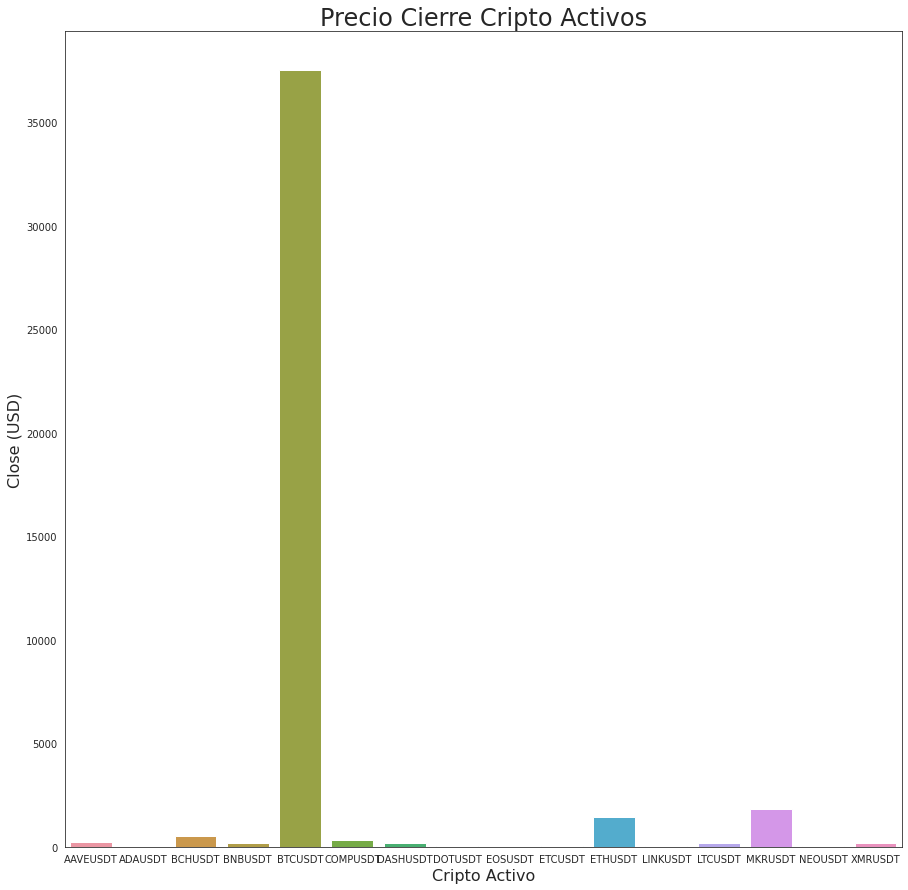

In [26]:
seaborn.set_style("white")
plt.figure(figsize=(15, 15))

#gráfico 
bar2 = seaborn.barplot(data=df,x="cripto_activo",  y="close", ci=None)

plt.xlabel('Cripto Activo',fontdict= { 'fontsize': 16})
plt.ylabel('Close (USD)',fontdict= { 'fontsize': 16})
plt.title('Precio Cierre Cripto Activos',fontdict= { 'fontsize': 24}, y =1.0)
plt.show()

## **Diccionario CRIPTO ACTIVOS**

Primero vamos a crear un dicccionario de dataframes, donde cada uno de ellos contendra las observaciones de uno de los cripto activos.

In [27]:
cripto_list = df.groupby('cripto_activo')[['cripto_activo']].count().index.tolist()

#CREO UN DICCIONARIO VACÍO
df_dict = {}
contador=0
for i in cripto_list:
  df_aux = df[df.cripto_activo == i]
  df_dict[i] = df_aux
  #EL DICCIONARIO GUARDA POR CLAVE VALOR CADA CRIPTO ACTIVO

  if contador<3:
    print(df_dict[i])
    contador+=1


                        open    close     high  ...  Month  Week   Weekday
2020-10-15 03:00:00   51.430   47.099   59.000  ...     10    42  Thursday
2020-10-15 04:00:00   47.097   47.486   47.916  ...     10    42  Thursday
2020-10-15 05:00:00   47.429   49.000   49.746  ...     10    42  Thursday
2020-10-15 06:00:00   49.000   49.031   49.496  ...     10    42  Thursday
2020-10-15 07:00:00   49.150   49.000   49.208  ...     10    42  Thursday
...                      ...      ...      ...  ...    ...   ...       ...
2021-05-16 11:00:00  559.210  547.340  560.560  ...      5    19    Sunday
2021-05-16 12:00:00  547.400  533.370  551.180  ...      5    19    Sunday
2021-05-16 13:00:00  533.120  536.660  537.990  ...      5    19    Sunday
2021-05-16 14:00:00  536.660  523.180  541.040  ...      5    19    Sunday
2021-05-16 15:00:00  523.180  519.160  524.200  ...      5    19    Sunday

[5111 rows x 10 columns]
                        open    close     high  ...  Month  Week   Weekday

## Histograma de activos

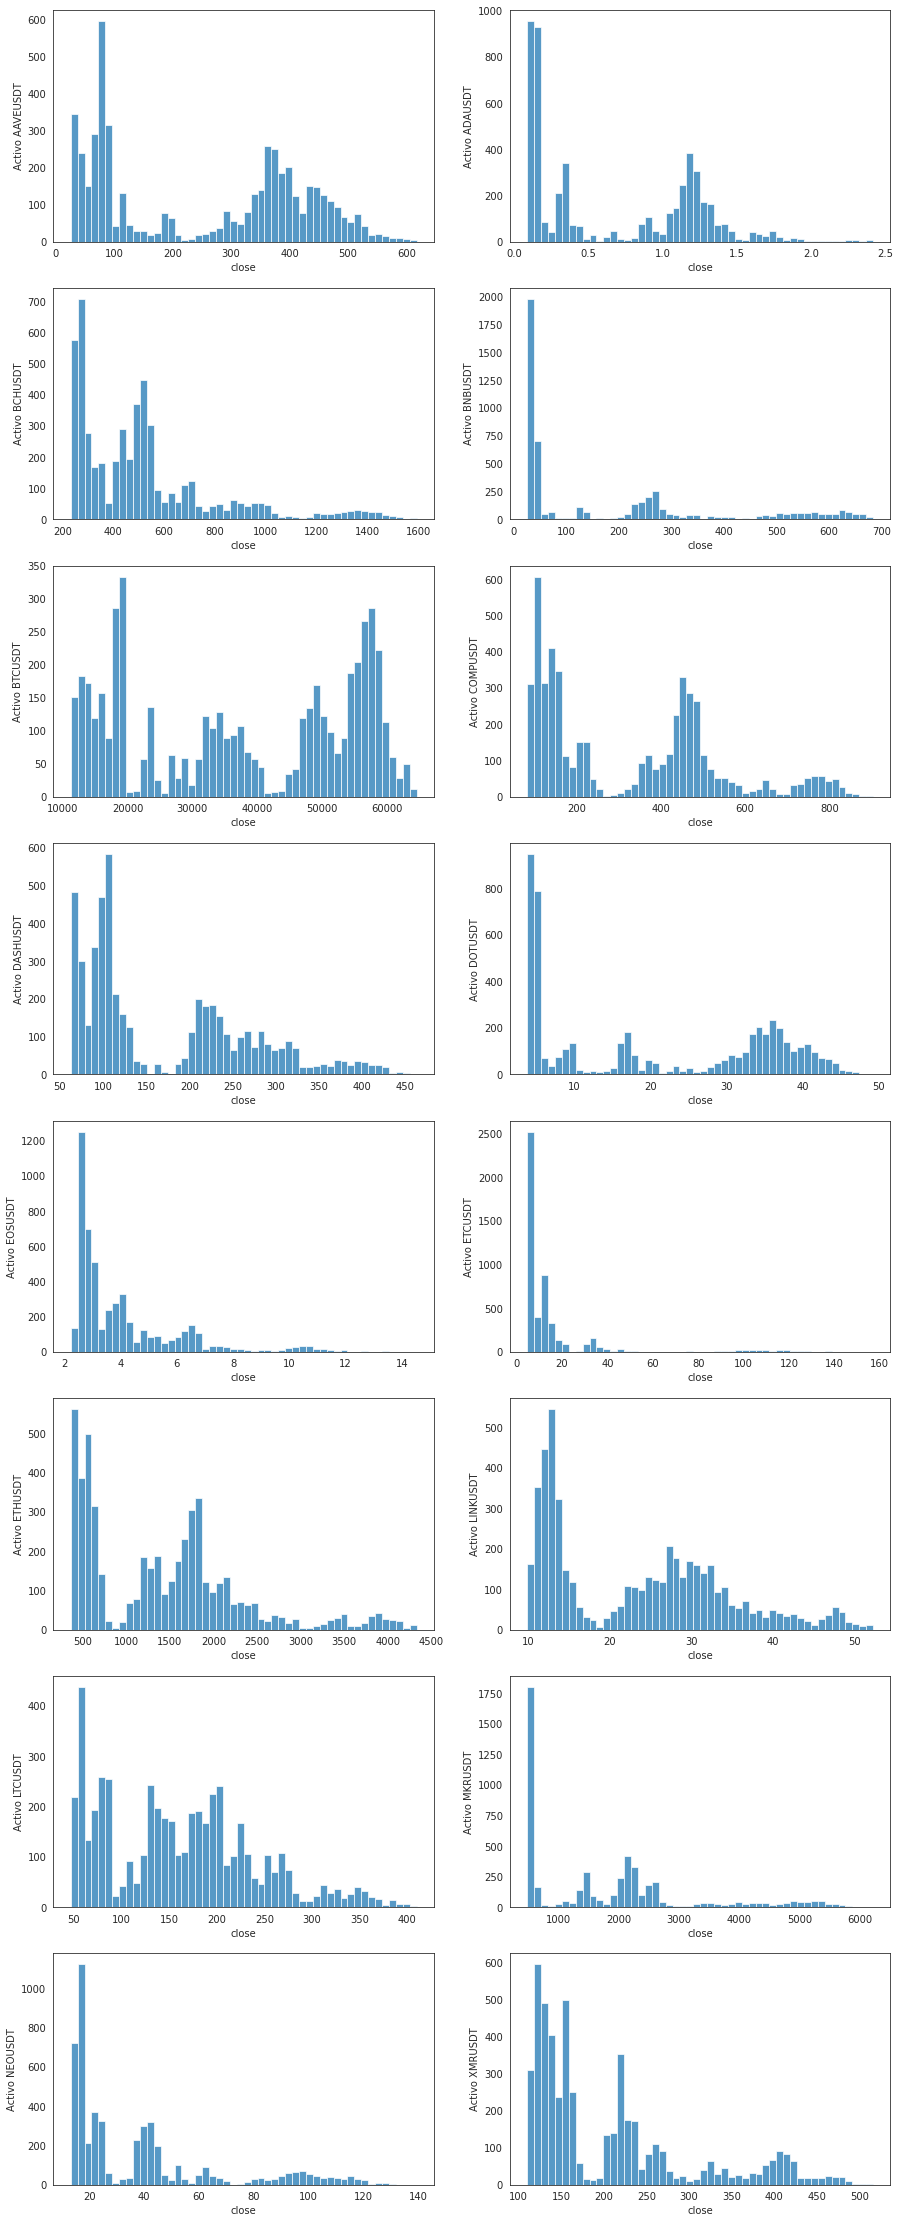

In [104]:
variable='close'

f,axs=plt.subplots(int(len(cripto_list)/2),2,figsize=(15,2.5*len(cripto_list)))

for cripto in cripto_list:
  indice=cripto_list.index(cripto)
  seaborn.histplot(df_dict[cripto][variable],bins=50,ax=axs[int(indice/2)][indice%2])
  label= "Activo "+ cripto
  axs[int(indice/2)][indice%2].set_ylabel(label)


Observando las distribuciones de los criptoactivos se ve claramente que al ser serie temporales, el tratamiento tiene que ser completamente distinto al que venimos acostumbrados, ya que se puede ver como cada distribucion es como una superposicion de distribuciones, se comportan como si fueran muchas poblaciones distintas superpuestas.

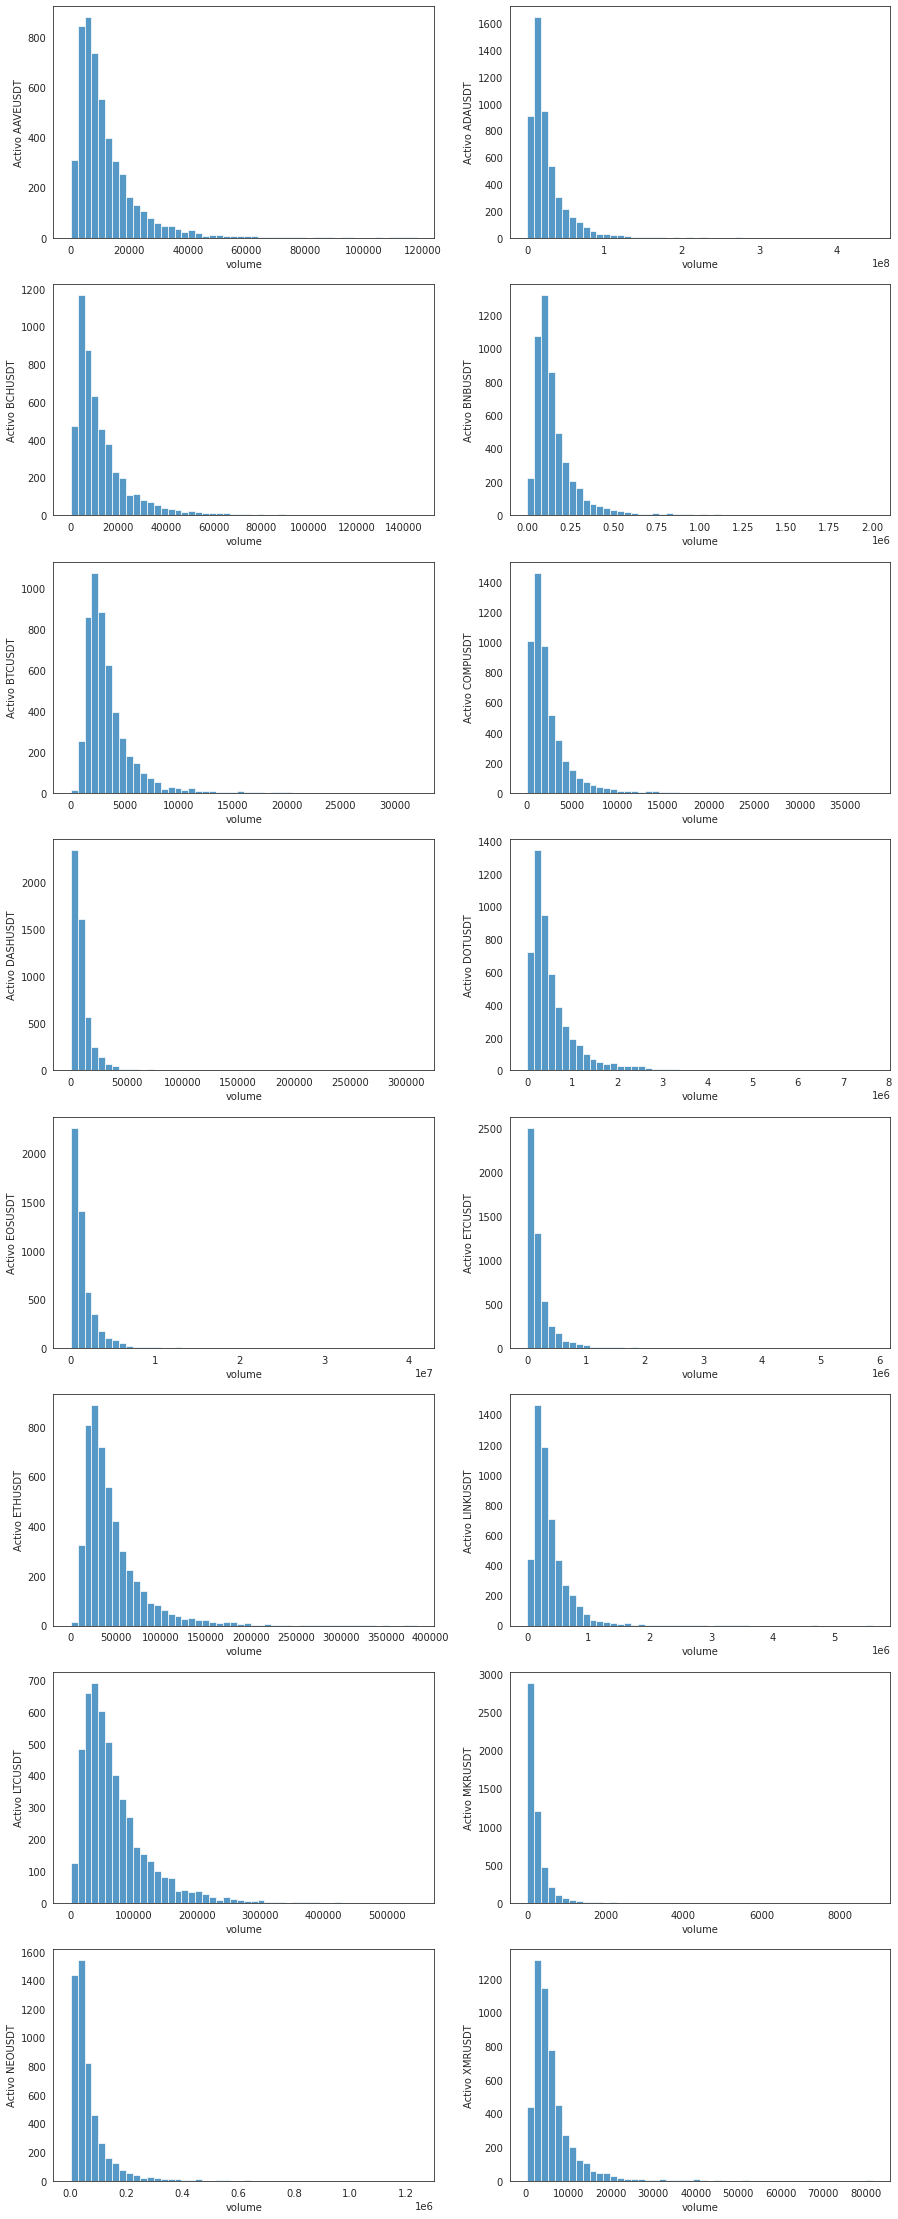

In [107]:
variable='volume'

f,axs=plt.subplots(int(len(cripto_list)/2),2,figsize=(15,2.5*len(cripto_list)))

for cripto in cripto_list:
  indice=cripto_list.index(cripto)
  df_item=df_dict[cripto]
  seaborn.histplot(df_dict[cripto][variable],bins=50,ax=axs[int(indice/2)][indice%2])
  label= "Activo "+ cripto
  axs[int(indice/2)][indice%2].set_ylabel(label)


In [30]:
#Histograma de todos los activos

# agregamos los ejes x para que sean visualmente comparables al tener los mismos xsticks, 
# teniendo en cuenta los percentiles seleccionados previamente
increment = 100


xticks_= df.volume.min()

#while aux1 < aux2 :
    #aux1= aux1 + increment
    #xticks_.append(aux1)

# agregamos el histograma del volumen transaccionado de cada cripto activo
fig, axes = plt.subplots(figsize=(30, 60), nrows=10, sharex=True)

for i in df['cripto_activo'].unique():
    item_cripto= i
    df_item=df_dict[i]
    
    indice=cripto_list.index(i)
    
    seaborn.histplot(data=df_item, x='volume', ax=axes[indice],binwidth=increment, stat='count')
    media_item=df_item.volume.mean()
    mediana_item=df_item.volume.median()
    min_item=df_item.volume.min()
    max_item=df_item.volume.max()

    ref='Media: '+ str(round(media_item)) + '\nMediana: '+ str(round(mediana_item))

    axes[indice].axvline(media_item, color='orangered',linestyle='--', label='Media')
    axes[indice].axvline(mediana_item, color='indigo',linestyle='-.', label='Mediana')
    axes[indice].axvline(min_item, color='red',
                linestyle='dotted', label='Minimo')
    axes[indice].axvline(max_item, color='red',
                linestyle='dotted', label='Maximo')

    label= "Activo "+ item_cripto
    axes[indice].set_ylabel(label)
    #axes[indice].set_xticks(xticks_)
    start, end= axes[indice].get_ylim()
    axes[indice].text(180000,end*0.8,ref,size=15,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))


seaborn.set_style("darkgrid")
seaborn.despine()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f0bf7fda440> (for post_execute):


KeyboardInterrupt: ignored

##**Diccionario de MEDIDAS DESCRIPTIVAS MÓVILES**

Obtendremos por cada crypto activo la media móvil, la desviación estándar móvil  y coeficiente de variación móvil del precio de cierre, y crearemos un segundo diccionario con estas medidas descriptivas.

In [31]:
#CREO UN DICCIONARIO VACÍO
mobile_mean_std_dict = {}
contador=0


for i in cripto_list:
  #obtenemos el dataframe de cada moneda del diccionario nº1, en le cual la frecuencia de las observaciones es H.
  df_data= df_dict[i]
  
  # Creamos un dataframe para guardra las medidas de la moneda en estudio 
  df_aux = pd.DataFrame(columns=['mobile_mean', 'mobile_std', 'coef_va'])
  
  # calculamos las medidas para un periodo de 1 dia (rolling(24)
  df_mean=df_data.close.rolling(24).mean()
  df_std=df_data.close.rolling(24).std()
  df_coefv=np.divide(df_std,df_mean)
  #concatenacion vertical
  df_aux=pd.concat([df_mean, df_std,df_coefv], axis=1)
  
  #Aplicamos al dataframe auxiliar la frecuencia '6h' y quitamos las filas NaN que se generan para la hora inicial, 
  # en la cual el valor de las medidas móviles es NaN por que NO hay periodo anterior con el cual hacer el cálculo
  df_aux= df_aux.asfreq(freq='D')
  df_aux= df_aux.dropna()
  #guardamos el dataframe con las medidas de la moneda en estudio en el 2º diccionario
  mobile_mean_std_dict[i] = df_aux

  mobile_mean_std_dict[i].columns=['mobile_mean', 'mobile_std', 'coef_va']

#EL DICCIONARIO GUARDA POR CLAVE VALOR LA MEDIA MOVIL DE CADA CRIPTO
  if contador<3:
    print(mobile_mean_std_dict)
    contador+=1

{'AAVEUSDT':                      mobile_mean  mobile_std   coef_va
2020-10-16 03:00:00    46.294708    1.891043  0.040848
2020-10-17 03:00:00    41.030042    1.012107  0.024667
2020-10-18 03:00:00    41.297000    0.734446  0.017784
2020-10-19 03:00:00    40.299958    0.273737  0.006792
2020-10-20 03:00:00    37.747458    1.825325  0.048356
...                          ...         ...       ...
2021-05-12 03:00:00   449.650000   21.993898  0.048913
2021-05-13 03:00:00   550.447500   31.238240  0.056751
2021-05-14 03:00:00   536.545000   34.808477  0.064875
2021-05-15 03:00:00   577.724583   26.178936  0.045314
2021-05-16 03:00:00   549.598333   18.991375  0.034555

[211 rows x 3 columns]}
{'AAVEUSDT':                      mobile_mean  mobile_std   coef_va
2020-10-16 03:00:00    46.294708    1.891043  0.040848
2020-10-17 03:00:00    41.030042    1.012107  0.024667
2020-10-18 03:00:00    41.297000    0.734446  0.017784
2020-10-19 03:00:00    40.299958    0.273737  0.006792
2020-10-20 03:

#**4) Análisis OUTLIERS y ESTACIONALIDAD de Bloxpots en diferentes períodos para un activo determinado.**

Elegimos para nuestro estudio el activo "**BTCUSDT**", por lo definimos  un nuevo dataframe "df_bloxplot" con esa moneda del diccionario.

In [ ]:
df_bloxplot=df_dict['BTCUSDT']
df_bloxplot[:3]

open     close      high  ...  Month  Week   Weekday
2020-10-15 03:00:00  11361.58  11378.96  11380.21  ...     10    42  Thursday
2020-10-15 04:00:00  11378.96  11388.73  11403.14  ...     10    42  Thursday
2020-10-15 05:00:00  11388.73  11403.95  11412.65  ...     10    42  Thursday

[3 rows x 10 columns]

### **4.1 BTCUSDT Boxplot Distribución por Mes**

Text(0.5, 0, 'Meses')

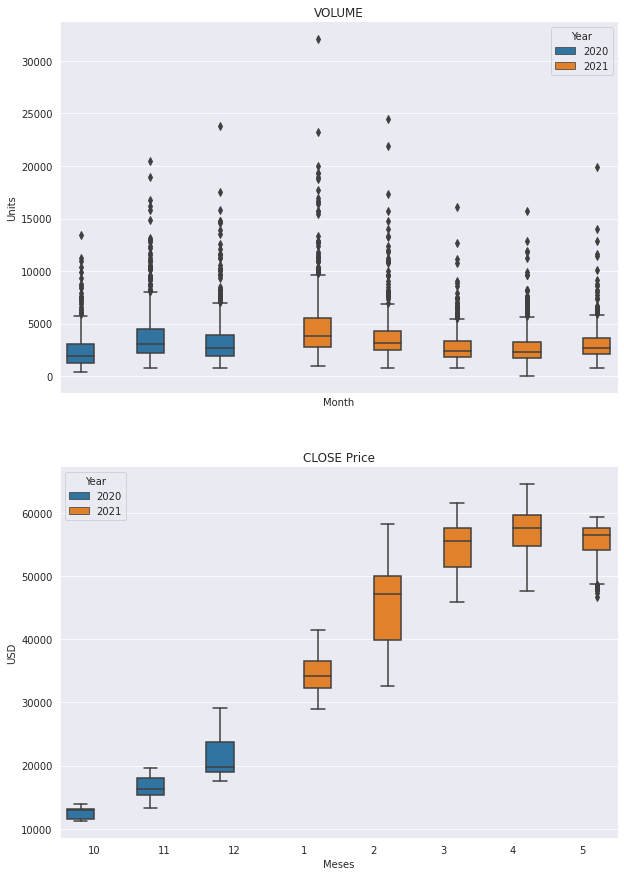

In [ ]:
orden_months=[10,11,12,1,2,3,4,5]

fig, ejes = plt.subplots(2, 1, figsize=(10, 15), sharex=True)
for name, eje in zip(['volume','close'], ejes):
    seaborn.boxplot(data=df_bloxplot, x='Month',hue='Year',y=name,ax=eje, order= orden_months)

    if (eje != axes[-1] and name!='volume'):
       eje.set_xlabel('')
       eje.set_ylabel('USD')
       eje.set_title(name.upper()+ ' Price')
    else:
       eje.set_ylabel('Units')
       eje.set_title(name.upper())    

seaborn.set_style("darkgrid")
seaborn.despine()
plt.xlabel('Meses')


Podemos observar que la distribución mensual de las variables relativas a precio del cripto activo (open, close, high y low) se mantienen en constante crecimiento, siguiendo todas ellas una curva similar. No se observan valores outliers exceptuando el mes de Mayo del presente año. La caja con mayor variacion entre sus percentiles (la más alta) es la del mes de Febrero de 2021.

Respecto a la distribución del la variable relativa al volumen transaccionado del cripto activo en estudio, observamos altas y bajas pero la mediana nunca supera las 5 mil unidades. La caja con mayor variacion entre sus percentiles (la más alta) es la del mes de Enero de 2021. Observamos también que existen muchos valores outliers.

### **4.2 BTCUSDT Boxplot Distribución por Semana**

Text(0.5, 0, 'Semanas')

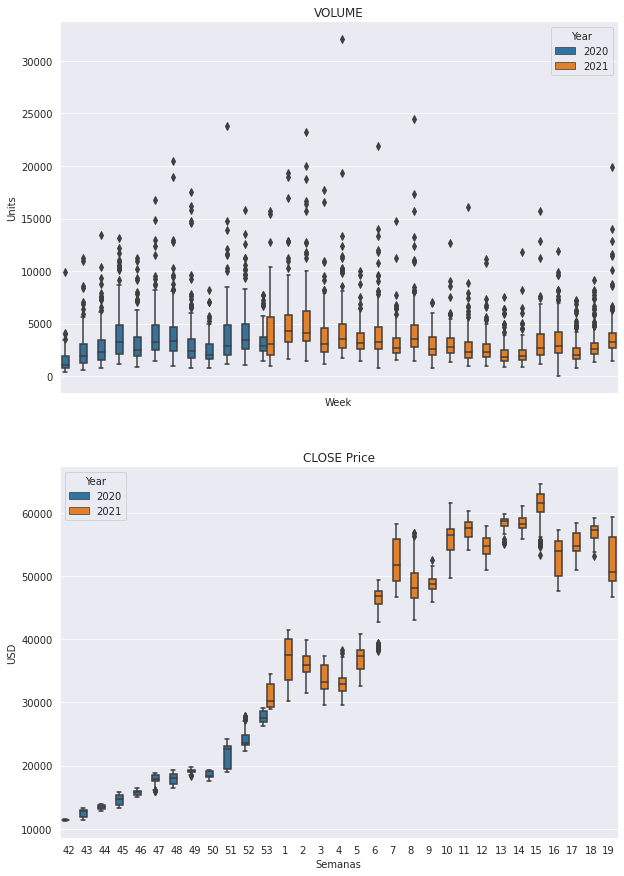

In [ ]:
orden_weeks=[42,43,44,45,46,47,48,49,50,51,52,53,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

fig, ejes = plt.subplots(2, 1, figsize=(10, 15), sharex=True)
for name, eje in zip(['volume','close'], ejes):
    seaborn.boxplot(data=df_bloxplot, x='Week',hue='Year',y=name,ax=eje, order= orden_weeks)

    if (eje != axes[-1] and name!='volume'):
       eje.set_xlabel('')
       eje.set_ylabel('USD')
       eje.set_title(name.upper()+ ' Price')
    else:
       eje.set_ylabel('Units')
       eje.set_title(name.upper())    

seaborn.set_style("darkgrid")
seaborn.despine()
plt.xlabel('Semanas')

Nuevamente, con el periodo semanal, podemos observar que la distribución de las variables relativas a precio del cripto activo (open, close, high y low) se mantienen en constante crecimiento, siguiendo todas ellas una curva similar. 
En este caso podemos observar varias semanas con outliers, destacándose los outliers con tendencia bajista en las semanas 7 y 15. 
Las cajas con mayor variacion entre sus percentiles (la más altas) son en las semanas 2,8,17 y 20 del presente año 2021.

Respecto a la distribución del la variable relativa al volumen transaccionado del cripto activo en estudio, observamos nuevamente que existen muchos valores outliers y que las semanas cuya mediana estuvo más cercana a las 5000 unidades fueron la primer y segunda semana del 2021.

###**4.3 BTCUSDT Boxplot Distribución por día de la semana**

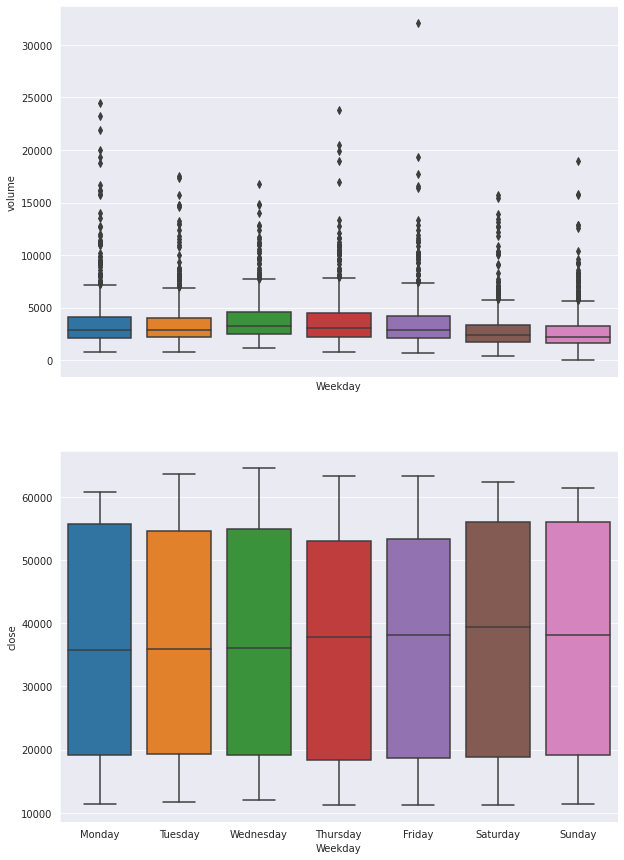

In [ ]:
periodo='Weekday'
variables=['volume','close']
orden=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 15), sharex=True)
for variable, ax in zip(variables, axes):
  seaborn.boxplot(data=df_bloxplot, x=periodo, y=variable, ax=ax, order=orden
                  )
  ax.set_ylabel(variable)

Desde la perspectiva de los días de semana, podemos observar que la distribución de las variables relativas a precio del cripto activo (open, close, high y low) muestra un patrón de crecimiento del lunes al miercoles, cuando alcanza su pico del valor máximo, y luego decrece hacia el domingo. No se observan outliers, pero se observa una gran dispersión.

Respecto a la distribución del la variable relativa al volumen transaccionado del cripto activo en estudio, observamos que presenta una mayor variación a mitad de semana, los días miercoles y jueves se presentan los mayores volumenes transaccionados (sus cajas son mas altas y sus máximos se aproximan más a las 10000 unidades). Por otro lado, los días con menor variación son los Sábados y Domingos (sus cajas son más angostas y tanto sus máximos como mínimos son menores en comparación a los demas días de la semana).



En general se nota la prescencia de outliers en la variable **'volume'**, se deberia decidir que trato darles, tal vez al hacer luego un analisis de media movil y desvio movil estos outliers se reduzcan

#5) Análisis de la evolución temporal de los activos.

Vamos a graficar el porcentaje de variación del precio de cierre del activo respecto al primer dia del periodo de interes.

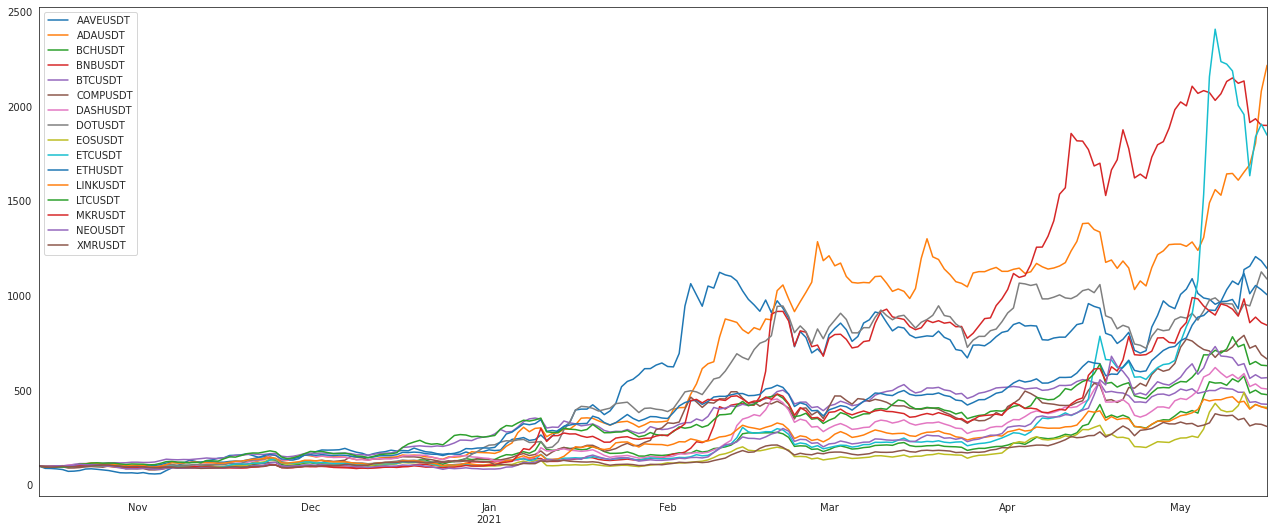

In [91]:
# Porcentaje de variacion diario respecto al comienzo del periodo
fig, axes = plt.subplots(1, 1, figsize=(22, 9), sharex=True)

for cripto in criptoactivos:
  close_aux= df_dict[cripto]['close']

  close_normalizado=close_aux.div(close_aux.iloc[0]).mul(100)
 
  close_normalizado=close_normalizado.resample('D').mean()
  close_normalizado.plot()
  
plt.legend(criptoactivos)
plt.show()

poner acac los boxplot

In [92]:
#Data Frame con variable Close
df_close= df.pivot(columns='cripto_activo',
 values='close')
#Data Frame con variable Volume
df_volume= df.pivot(columns='cripto_activo',
 values='volume')

 ¿En qué sentido tienden a moverse? ¿Hay períodos de crisis? ¿Los activos tienden a moverse en forma conjunta? En caso de que existan crisis, ¿son globales o individuales?

Se observa en la evolución temporal de los activos una tendencia a moverse en forma conjunta con algunos despegues de algunos

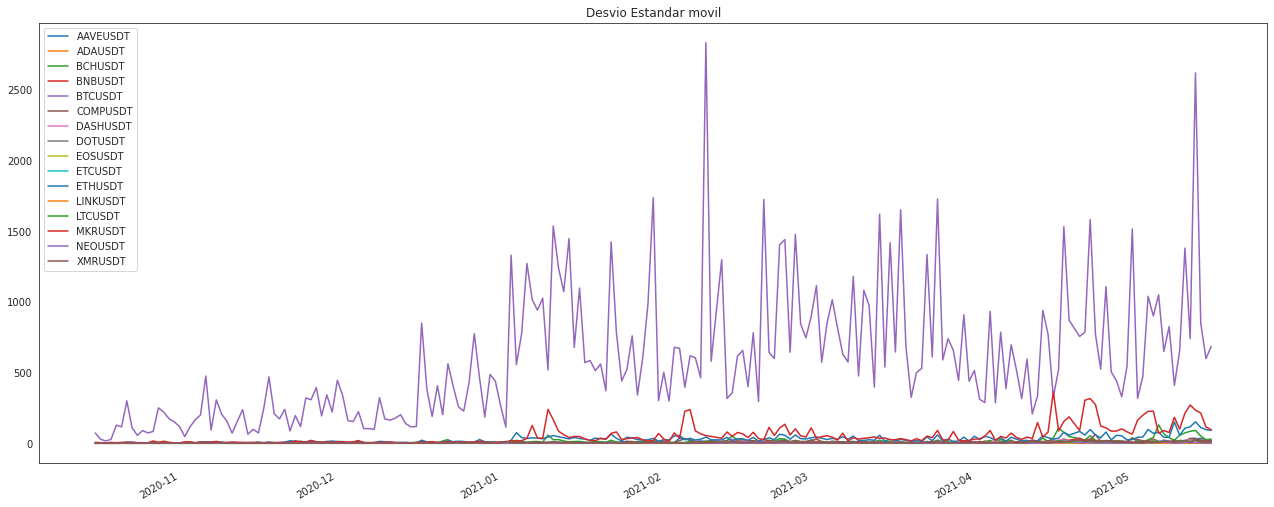

In [56]:
##Desvio Estandar Movil 6 periodos
fig, axes = plt.subplots(1, 1, figsize=(22, 9), sharex=True)
for cripto in criptoactivos:
  mobile_mean_std_dict[cripto]['mobile_std'].plot()
plt.title('Desvio Estandar movil')
plt.legend(criptoactivos)
plt.show()

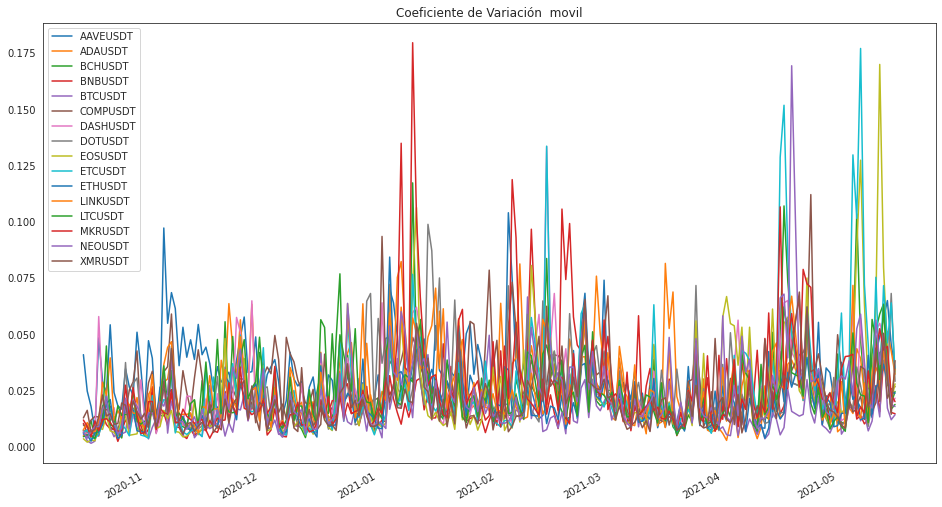

In [59]:
# Coeficiente de Variacion Movil 6 periodos
fig, axes = plt.subplots(1, 1, figsize=(16, 9), sharex=True)
for cripto in criptoactivos:
  mobile_mean_std_dict[cripto]['coef_va'].plot()
plt.legend(criptoactivos)
plt.title('Coeficiente de Variación  movil')
plt.show()

# PARTE II - RESPUESTAS

##1) Calcule los logaritmos naturales de los precios de los activos y la serie de tasas de rendimiento (para ello explorar el método pct_change()).


In [46]:
#Diccionario con cambios porcentuales respecto al valor anterior (Tasa de rendimiento simple)
df_tasasimple=df_close.pct_change()

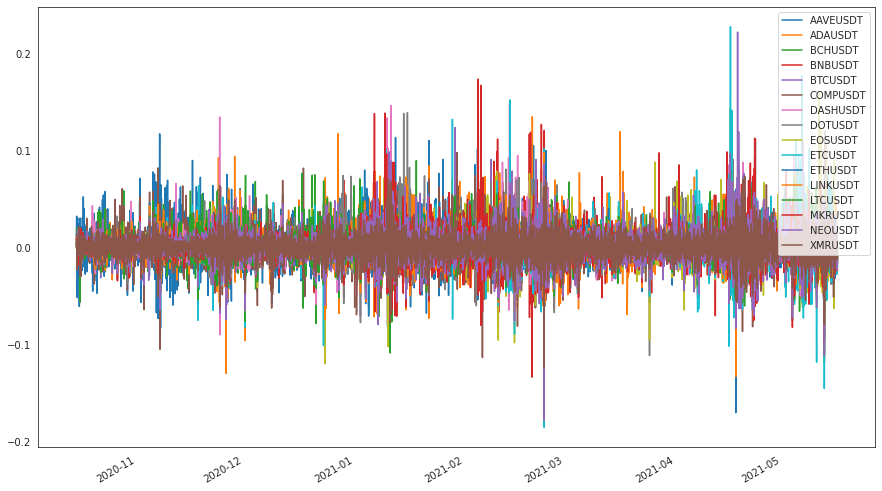

In [50]:
#Evolucion temporal de la tasa de rendimiento simple

fig, axes = plt.subplots(1, 1, figsize=(15, 9), sharex=True)
df_tasasimple.plot(ax=axes)

In [51]:
#calculando el retorno logarítmico
# df['pct_change_close'] = df.close.pct_change()
# df['log_ret'] = np.log(df.close) - np.log(df.close.shift(1))
df_tasalog= np.log(df_close/df_close.shift(1))

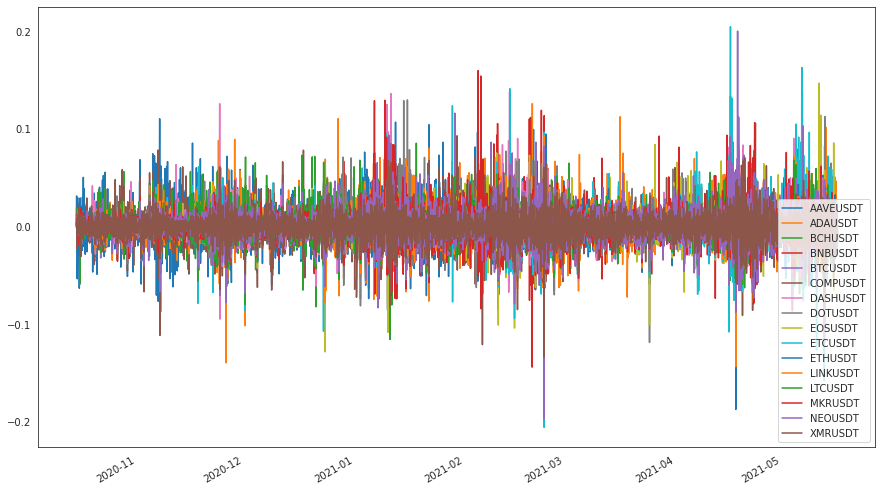

In [52]:
#Evolucion temporal de la tasa de rendimiento logaritmica

fig, axes = plt.subplots(1, 1, figsize=(15, 9), sharex=True)
df_tasalog.plot(ax=axes)

##2)Realice nuevamente un análisis de las distribuciones por medio de gráficos y medidas de estadística descriptiva con las nuevas series.



In [67]:
df_tasalog.describe()

AAVEUSDT      ADAUSDT  ...      NEOUSDT      XMRUSDT
count  5110.000000  5110.000000  ...  5110.000000  5110.000000
mean      0.000470     0.000603  ...     0.000338     0.000219
std       0.019341     0.016190  ...     0.016299     0.012658
min      -0.187208    -0.139529  ...    -0.196604    -0.133440
25%      -0.009760    -0.006953  ...    -0.007075    -0.005968
50%       0.000261     0.000200  ...     0.000332     0.000360
75%       0.010395     0.007394  ...     0.007861     0.006729
max       0.110406     0.126017  ...     0.200202     0.070583

[8 rows x 16 columns]

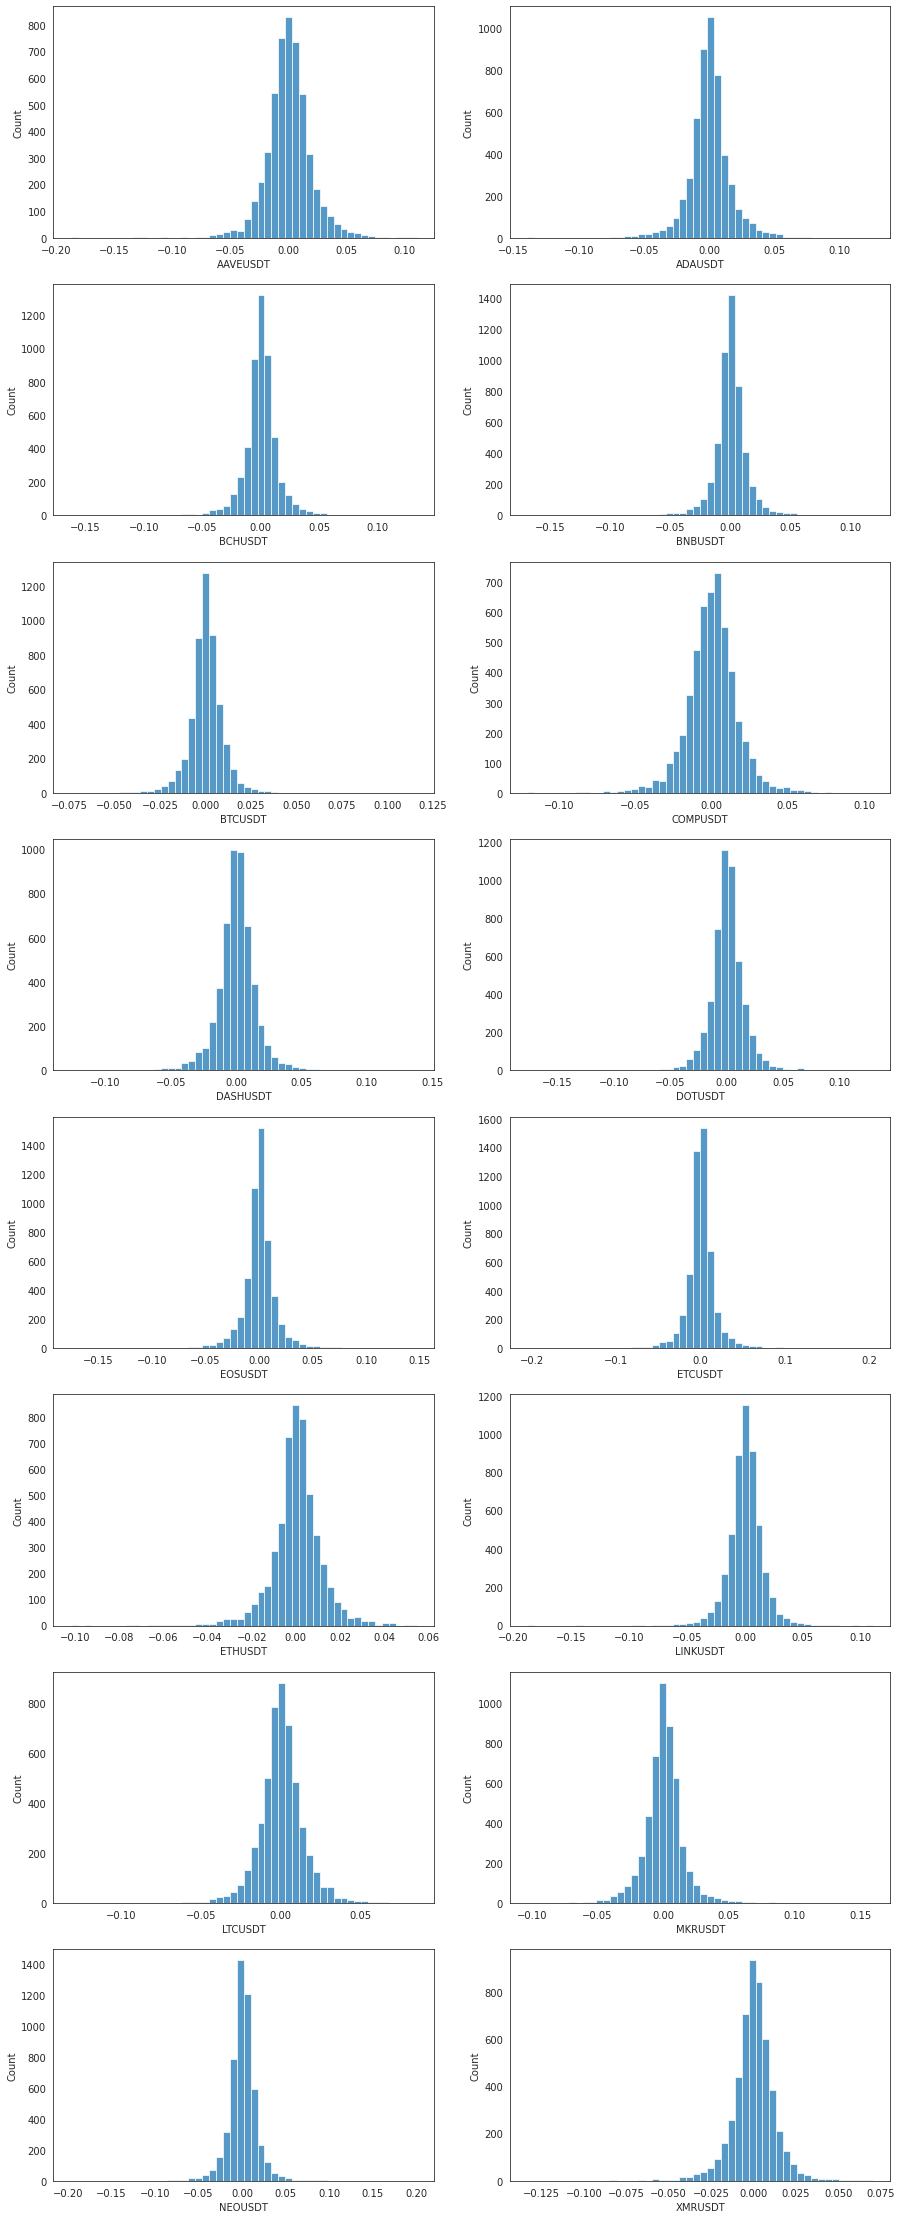

In [101]:
f,axs=plt.subplots(int(len(cripto_list)/2),2,figsize=(15,2.5*len(cripto_list)))

for cripto in cripto_list:
  indice=cripto_list.index(cripto)
  seaborn.histplot(df_tasalog[cripto],bins=50,ax=axs[int(indice/2)][indice%2])


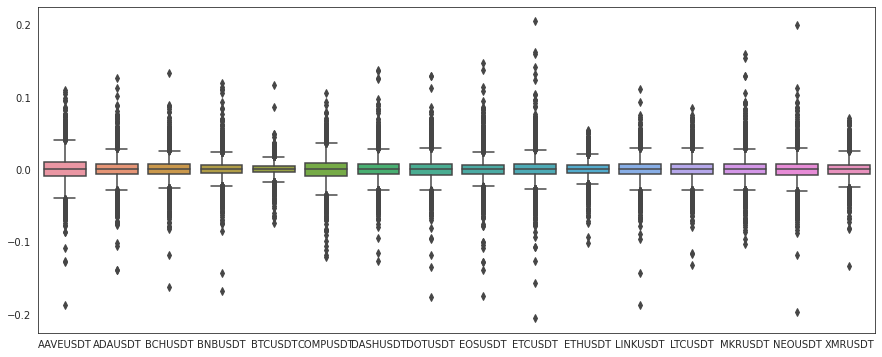

In [114]:
f,axs=plt.subplots(1,1,figsize=(15,6))
seaborn.boxplot(data=df_tasalog)

Se observa que las distribuciones tienen una apariencia normal, centrada en 0 y con poca desviación  

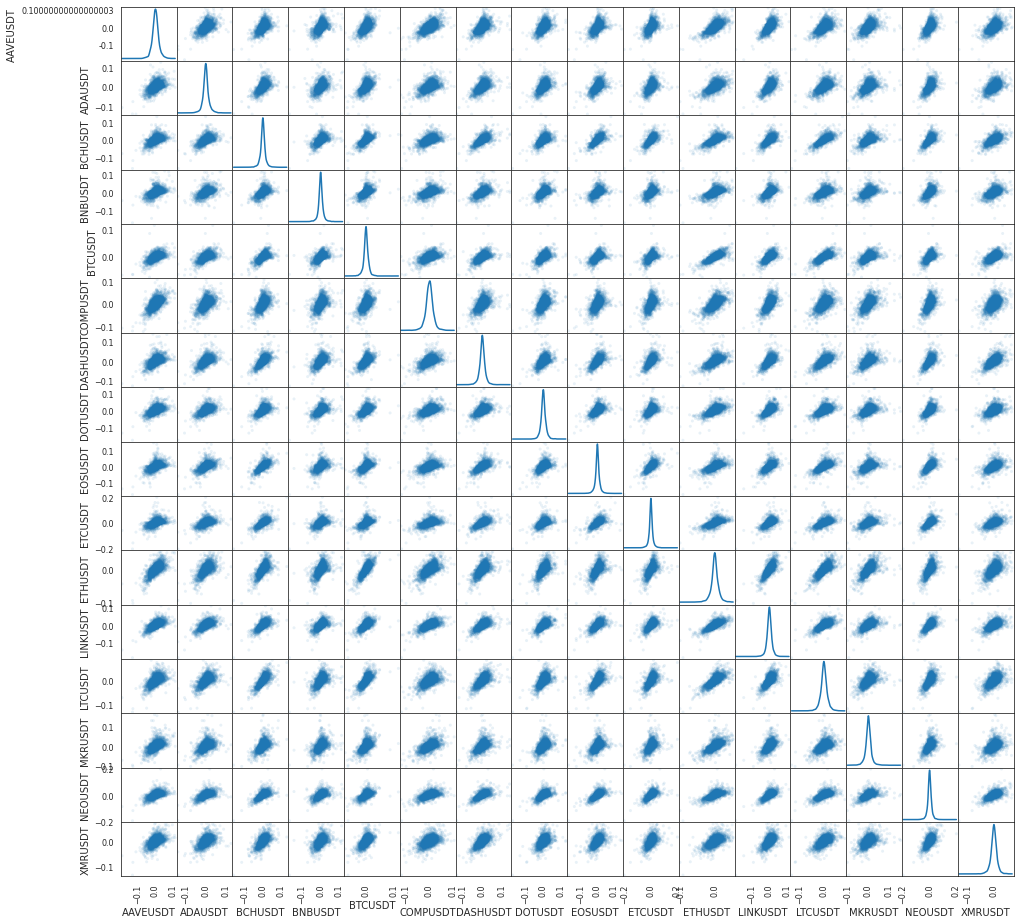

In [129]:
 pd.plotting.scatter_matrix(df_tasalog, diagonal='kde', alpha=0.1, figsize=(16,16))
 print('')

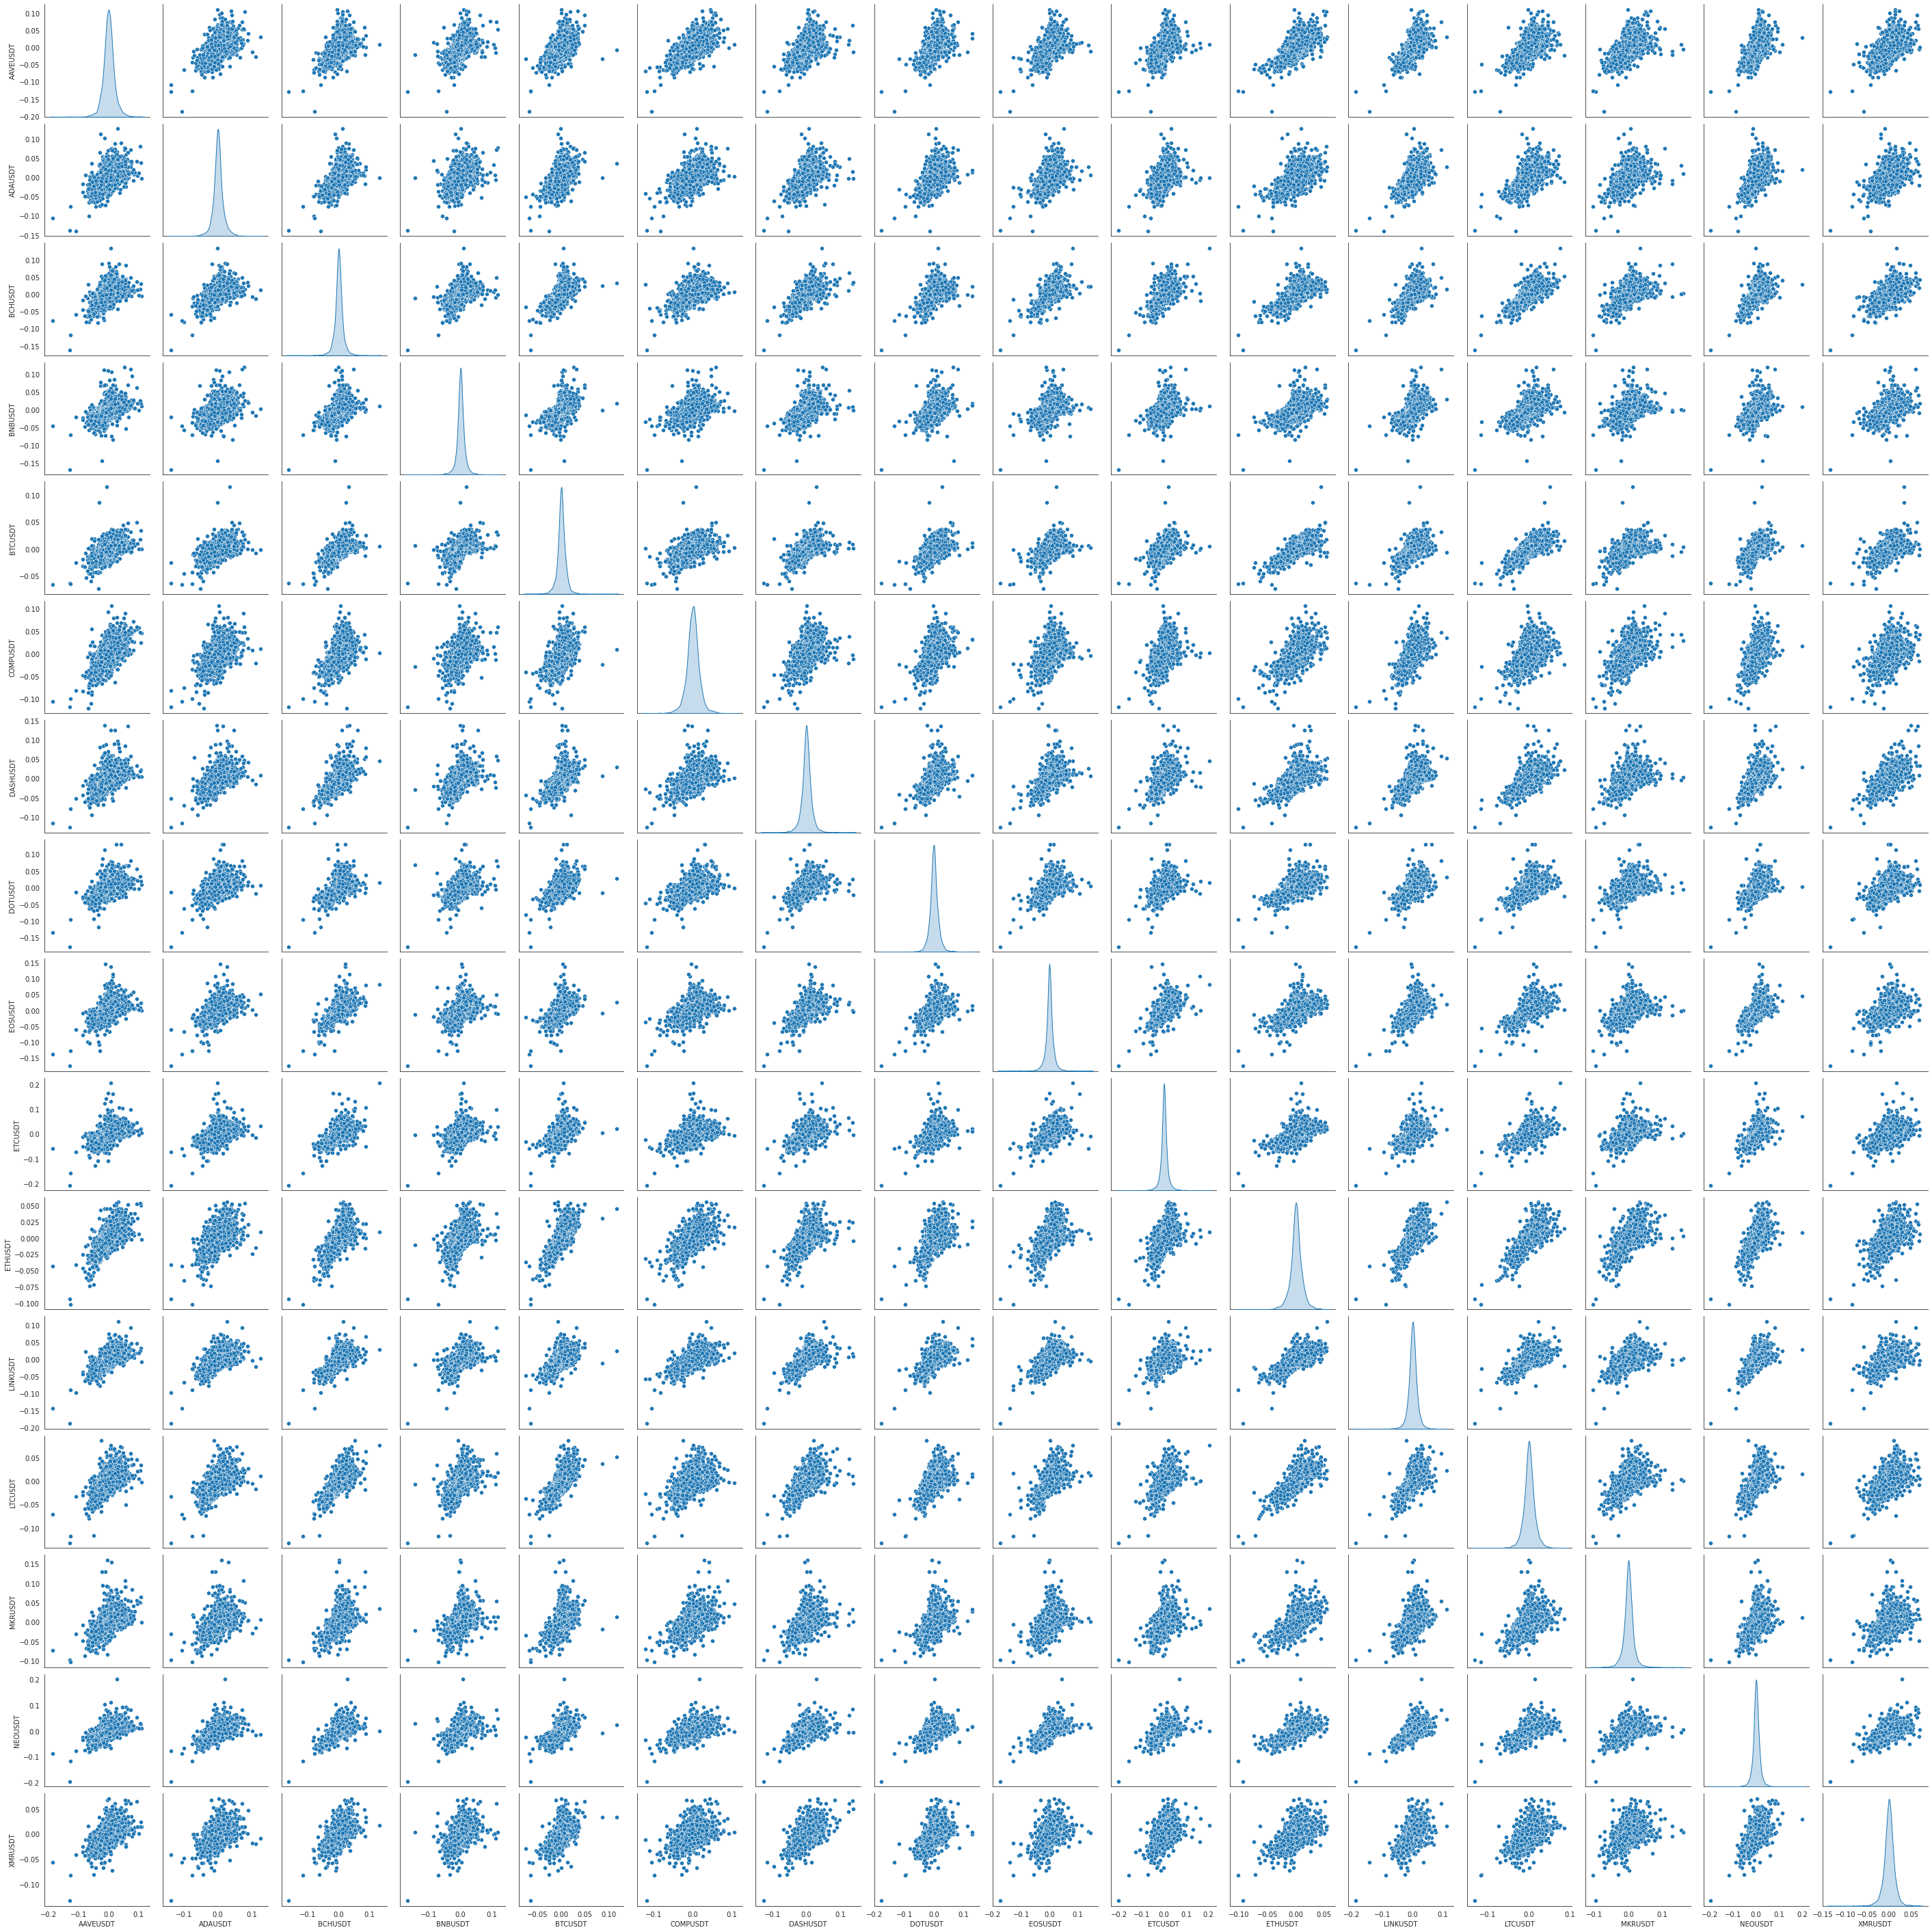

In [126]:
seaborn.pairplot(df_tasalog, diag_kind="kde")

##3) Explore la volatilidad de las series, por ejemplo graficando las desviaciones estándar móviles.

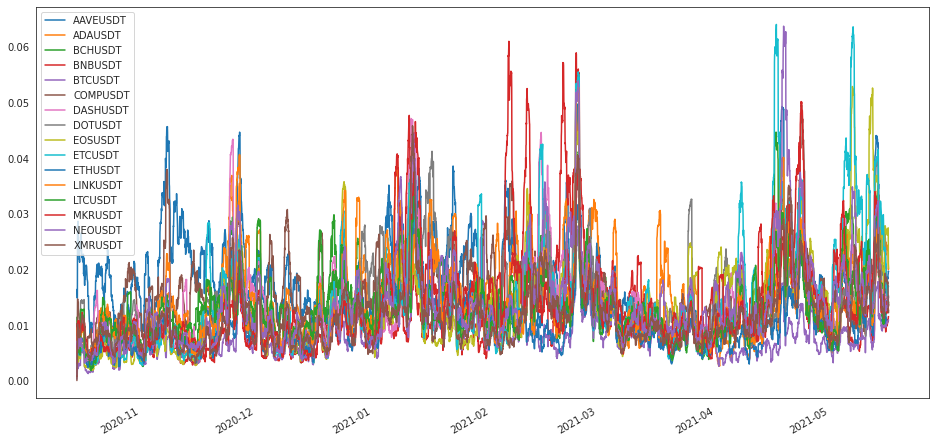

In [130]:

volatilidad = df_tasalog.rolling('D').std()
volatilidad.plot(figsize=(16, 8));

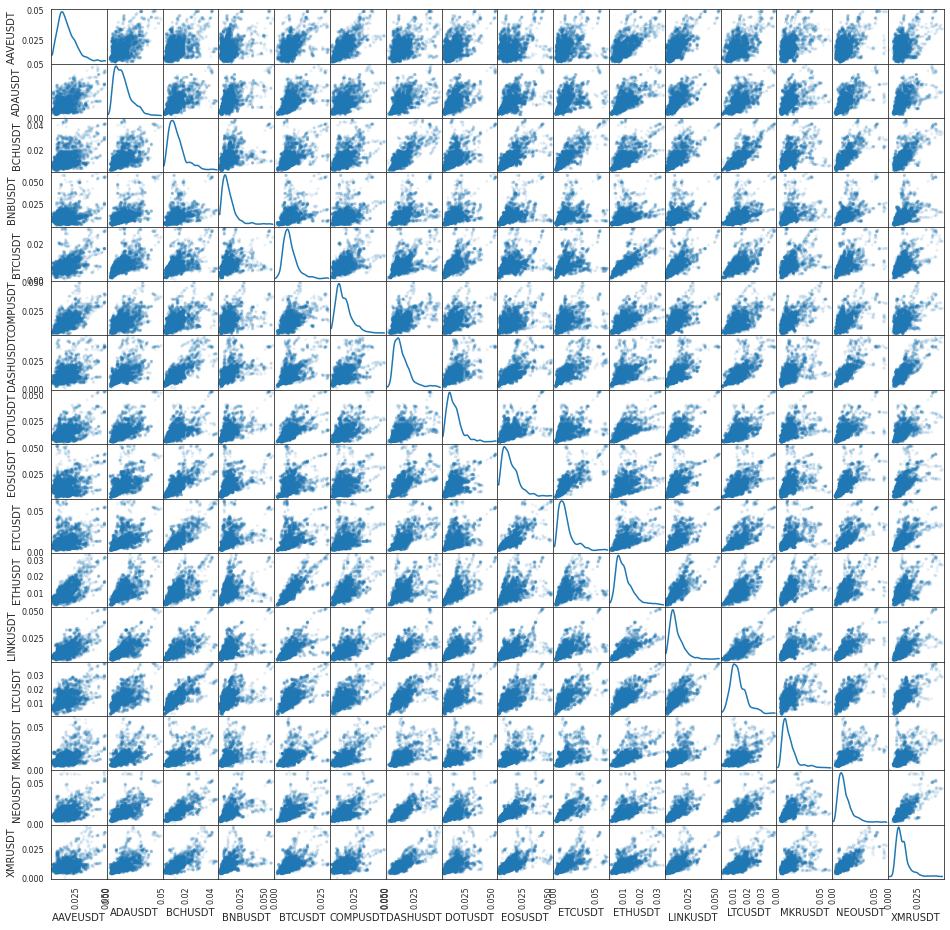

In [131]:
 pd.plotting.scatter_matrix(volatilidad, diagonal='kde', alpha=0.1, figsize=(16,16))
 print('')

Se observa en general una correlacion directa entre los cripto activos, pero entre algunos es mucho más marcada que entre otros